In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from IPython.display import display, Math

### Part 1

Exercise 1: Jump discontinuity in np

$$ f(x) =\begin{cases}sin(x \pi) & if & x < 0\\1.5 & if & x = 0 \\ -(x-2)^2 & if & x > 0 \end{cases}$$

$$ D = -1 \leq x \leq 2$$

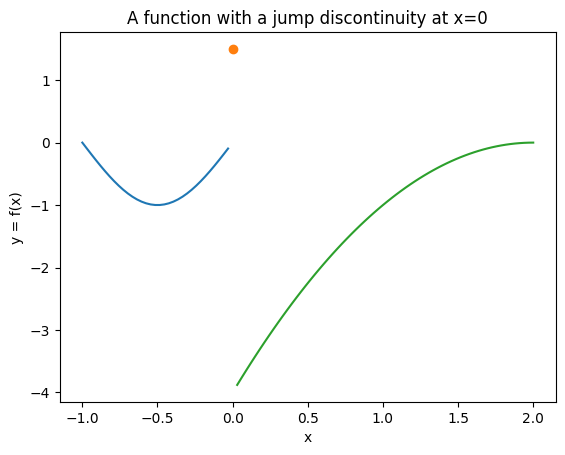

In [15]:
x_values = np.linspace(-1,2,100)
y = np.zeros(len(x_values))

y[x_values < 0] = np.sin(x_values[x_values < 0]*np.pi)
y[x_values == 0] = 1.5
y[x_values > 0] = -1*(x_values[x_values > 0]-2)**2

plt.plot(x_values[x_values < 0], y[x_values < 0])
plt.plot(x_values[x_values == 0], y[x_values == 0],'o')
plt.plot(x_values[x_values > 0], y[x_values > 0])
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('A function with a jump discontinuity at x=0')
plt.show()


Exercise 1: Jump discontinuity in sympy

$$ f(x) =\begin{cases}sin(x \pi) & if & x < 0\\1.5 & if & x = 0 \\ -(x-2)^2 & if & x > 0 \end{cases}$$

$$ D = -1 \leq x \leq 2$$

<IPython.core.display.Math object>

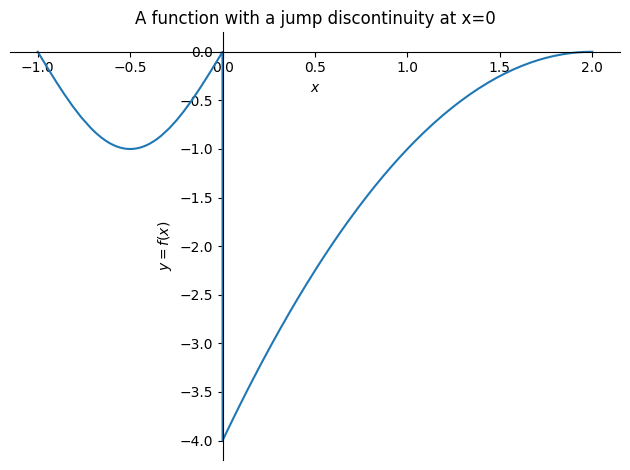

1.50000000000000

In [24]:
x = sp.symbols('x')
fx = sp.Piecewise((sp.sin(sp.pi*x), x < 0),
                  (1.5, sp.Eq(x,0)),
                  (-1*(x-2)**2, x > 0))
display(Math('f(x) = '+ sp.latex(fx)))
sp.plot(fx, (x, -1, 2), ylabel="$y = f(x)$", xlabel="$x$", title="A function with a jump discontinuity at x=0", show=True)
display(fx.subs(x,0))

Exercise 3: Removable discontinuity

$$ f(x) =\begin{cases}sin(x \pi) + x^2 & for & x \neq 0 \\ \pi & for & x = 0 \end{cases} $$ 

$$ D = -1 \leq x \leq 2$$

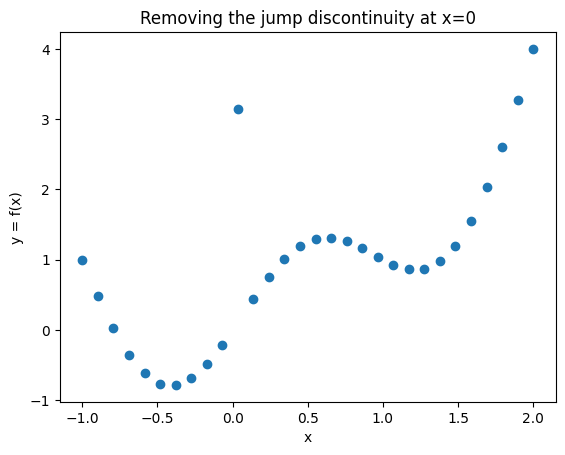

In [51]:
# the challenge was to do this modifying just the y
x_values = np.linspace(-1,2,30)
y = np.zeros(len(x_values))

y = np.sin(x_values*np.pi) + x_values**2

# my answer
# closest2pi = np.abs(y - np.pi) == np.min(np.abs(y - np.pi))
# x_values[closest2pi] = 0

# the correct answer
y[np.argmin(np.abs(x_values-0))] = np.pi

plt.plot(x_values, y, 'o')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('Removing the jump discontinuity at x=0')
plt.show()


### Part 2

Exercise 4: Infinite discontiniuity using np

$$ f(x) = \frac{3}{1-x^2} \\
D = -2 \leq x \leq 2$$ 

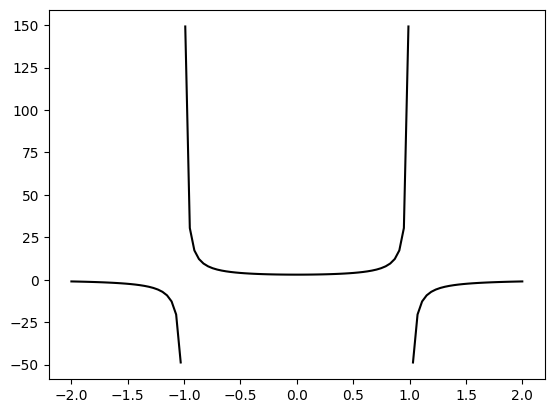

In [58]:
x_values = np.linspace(-2,2,100)

y = 3/(1-x_values**2)

plt.plot(x_values[x_values<-1], y[x_values<-1],'k')
plt.plot(x_values[(x_values>-1) & (x_values<1)], y[(x_values>-1) & (x_values<1)],'k')
plt.plot(x_values[x_values>1], y[x_values>1],'k')

now in sympy

In [89]:
from sympy.calculus.util import continuous_domain, singularities
from sympy import S
x = sp.symbols('x')
fx = sp.Poly(x, 3/(1-x**2))
# continious domain of the function
display(continuous_domain(fx, x, sp.Interval(-2,2))) # S.Reals is the set of all real numbers or use sp.Interval(-2,2)
# singularities of the function
display(singularities(fx, x, sp.Interval(-2,2)))

Union(Interval.Ropen(-2, -1), Interval.open(-1, 1), Interval.Lopen(1, 2))

{-1, 1}

Exercise 5: Oscillating discontinuity using np and sympy

$$ f(x) = \sin  \big(\frac{1}{x-1}\big) \\
D = -1 \leq x \leq 2$$

C:\Users\tulio.fernandes\AppData\Local\Temp\ipykernel_12932\1988988182.py:3: RuntimeWarning: divide by zero encountered in divide
  y = np.sin(1/(x_values-1))
C:\Users\tulio.fernandes\AppData\Local\Temp\ipykernel_12932\1988988182.py:3: RuntimeWarning: invalid value encountered in sin
  y = np.sin(1/(x_values-1))


Text(0.5, 1.0, 'A function with an essential discontinuity at x=1')

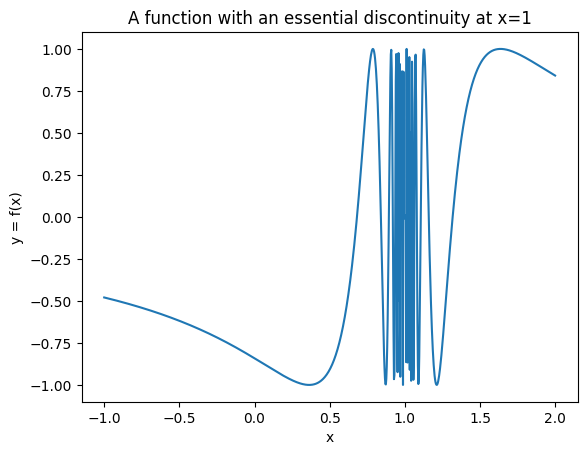

In [105]:
x_values = np.linspace(-1,2,1000)

y = np.sin(1/(x_values-1))

plt.plot(x_values, y)
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.title('A function with an essential discontinuity at x=1')

<IPython.core.display.Math object>

{1}

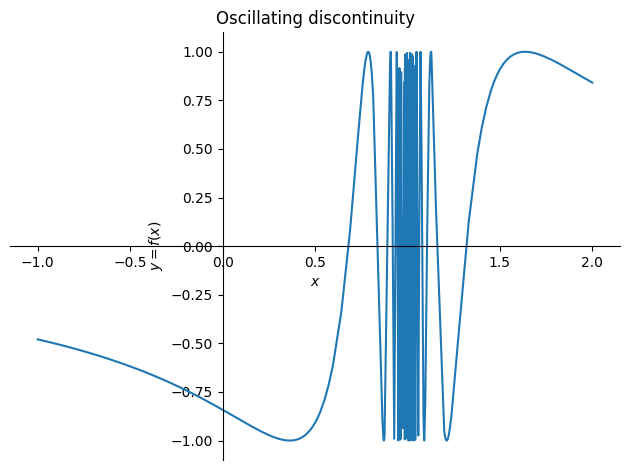

In [102]:
from sympy.calculus.util import continuous_domain, singularities
x = sp.symbols('x')
fx = sp.sin(1/(x-1))
display(Math('f(x) = '+ sp.latex(fx)))

display(singularities(fx, x, sp.Interval(-1,2)))

# due to the discontinuity at x=1, the function is not continuous in the interval [-1,2]
# update to the piecewise function using the interval [-1,1) and (1,2]
fx = sp.Piecewise((sp.sin(1/(x-1)), x < 0.999), (sp.sin(1/(x-1)), x > 1.001))

sp.plot(fx, (x, -1, 2), ylabel="$y = f(x)$", xlabel="$x$", title="Oscillating discontinuity", show=True)


mike solution

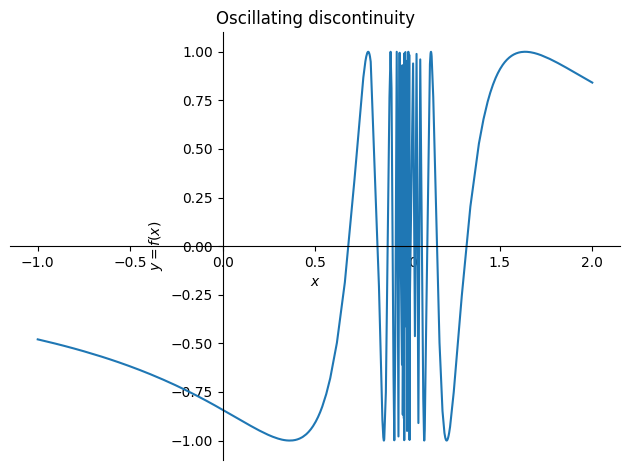

In [106]:
sfx = sp.sin(1/(x-1))
sp.plot(sfx, (x, -1, 2), ylabel="$y = f(x)$", xlabel="$x$", title="Oscillating discontinuity", show=True)